In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap


In [11]:
df=pd.read_csv("C:\\Users\\Philipp\\OneDrive - UT Cloud\\Data_literacy_mensa\\Mensa_08-01-24\\CSV\\Thursday11012024.csv")
df

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol
0,1,"Jan 8, 2024 13:49:05.446769000 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP
1,2,"Jan 8, 2024 13:49:05.446955000 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP
2,3,"Jan 8, 2024 13:49:05.447144000 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP
3,4,"Jan 8, 2024 13:49:05.447194000 CET",7e:75:54:0e:55:bb,00:f6:63:81:c8:6f,802.11
4,5,"Jan 8, 2024 13:49:05.447243000 CET",NaN,NaN,802.11
...,...,...,...,...,...
13870839,398012,"Jan 8, 2024 13:29:05.249678000 CET",NaN,NaN,802.11
13870840,398013,"Jan 8, 2024 13:29:05.249719000 CET",NaN,NaN,802.11
13870841,398014,"Jan 8, 2024 13:29:05.249804000 CET",NaN,NaN,802.11
13870842,398015,"Jan 8, 2024 13:29:05.249849000 CET",NaN,NaN,802.11


<Axes: ylabel='Density'>

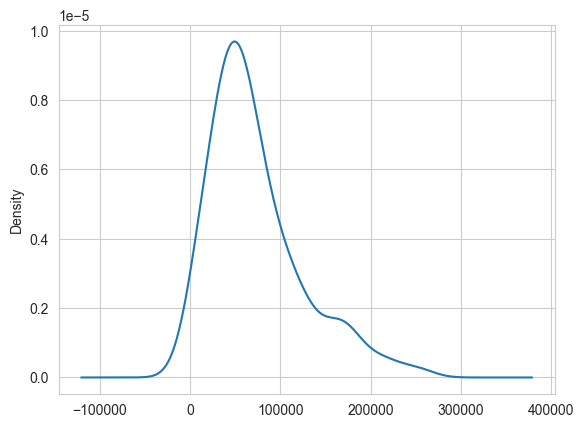

In [12]:
df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df["frame.time"].value_counts().sort_index().plot(kind='density')


In [13]:
df['date-time'] = pd.to_datetime(df['frame.time'].str.replace('W. Europe Standard Time', 'CET'), format='%b %d, %Y %H:%M %Z')
df['hour:minute'] = df['date-time'].dt.strftime('%H:%M')
df

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,date-time,hour:minute
0,1,"Jan 8, 2024 13:49 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP,2024-01-08 13:49:00+01:00,13:49
1,2,"Jan 8, 2024 13:49 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP,2024-01-08 13:49:00+01:00,13:49
2,3,"Jan 8, 2024 13:49 CET",00:f6:63:81:c8:6f,e2:94:28:0a:5a:1a,EAP,2024-01-08 13:49:00+01:00,13:49
3,4,"Jan 8, 2024 13:49 CET",7e:75:54:0e:55:bb,00:f6:63:81:c8:6f,802.11,2024-01-08 13:49:00+01:00,13:49
4,5,"Jan 8, 2024 13:49 CET",NaN,NaN,802.11,2024-01-08 13:49:00+01:00,13:49
...,...,...,...,...,...,...,...
13870839,398012,"Jan 8, 2024 13:29 CET",NaN,NaN,802.11,2024-01-08 13:29:00+01:00,13:29
13870840,398013,"Jan 8, 2024 13:29 CET",NaN,NaN,802.11,2024-01-08 13:29:00+01:00,13:29
13870841,398014,"Jan 8, 2024 13:29 CET",NaN,NaN,802.11,2024-01-08 13:29:00+01:00,13:29
13870842,398015,"Jan 8, 2024 13:29 CET",NaN,NaN,802.11,2024-01-08 13:29:00+01:00,13:29


In [14]:
(df["wlan.sa"].value_counts()).count()
#df["wlan.sa"].value_counts()

526939

In [29]:
df_only_broadcast = df.loc[df["wlan.da"] == 'ff:ff:ff:ff:ff:ff']

In [30]:
df_first = df_only_broadcast.drop_duplicates(subset='wlan.sa', keep='first')
df_first.tail()
df_first["wlan.sa"].nunique()

12157

Text(0.5, 1.0, 'first seen Count vs Time')

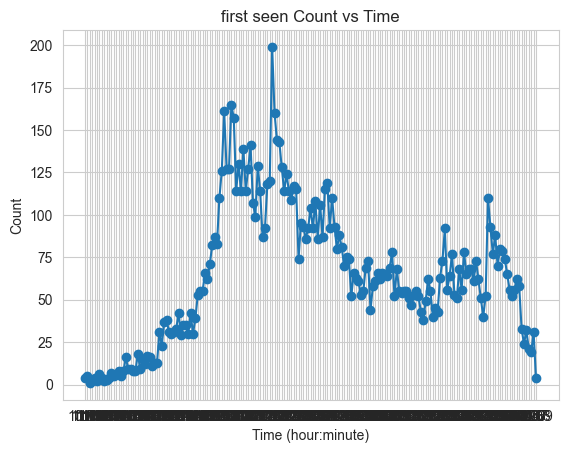

In [25]:
per_min_new=pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [18]:
df_last = df.drop_duplicates(subset='wlan.sa', keep='last')
df_last.tail()

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,date-time,hour:minute
13870740,397913,"Jan 8, 2024 13:29 CET",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,2024-01-08 13:29:00+01:00,13:29
13870742,397915,"Jan 8, 2024 13:29 CET",4e:c1:82:85:77:67,00:f6:63:81:c8:6f,802.11,2024-01-08 13:29:00+01:00,13:29
13870791,397964,"Jan 8, 2024 13:29 CET",15:83:ab:7c:ba:71,0a:c3:0e:1e:af:f9,802.11,2024-01-08 13:29:00+01:00,13:29
13870836,398009,"Jan 8, 2024 13:29 CET",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,2024-01-08 13:29:00+01:00,13:29
13870843,398016,"Jan 8, 2024 13:29 CET",NaN,NaN,802.11,2024-01-08 13:29:00+01:00,13:29


Text(0.5, 1.0, 'Last seen Count vs Time')

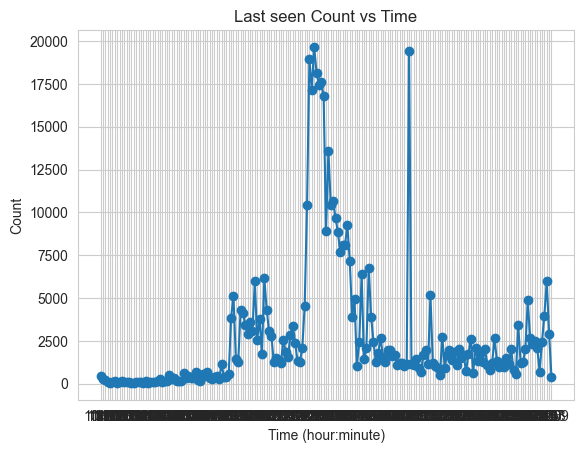

In [19]:
per_min_last=pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

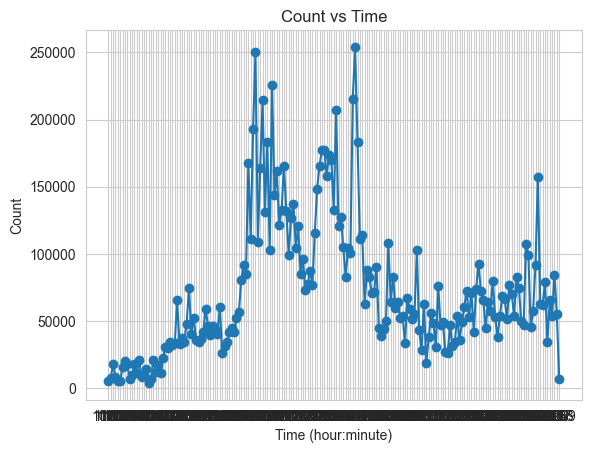

In [20]:
per_min=pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_3104\1105561439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

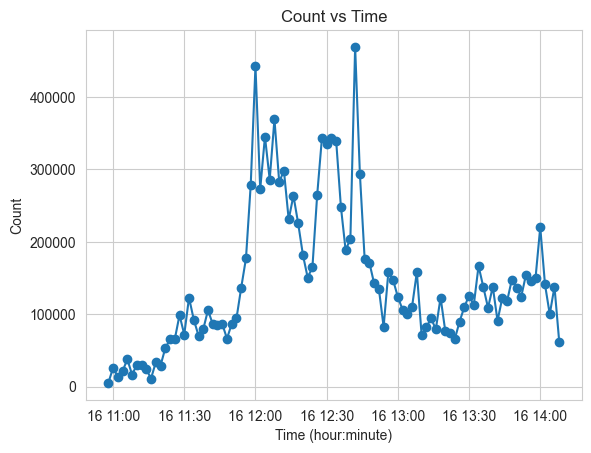

In [21]:
dtt = pd.DataFrame({'hour:minute':per_min.index.tolist(),'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

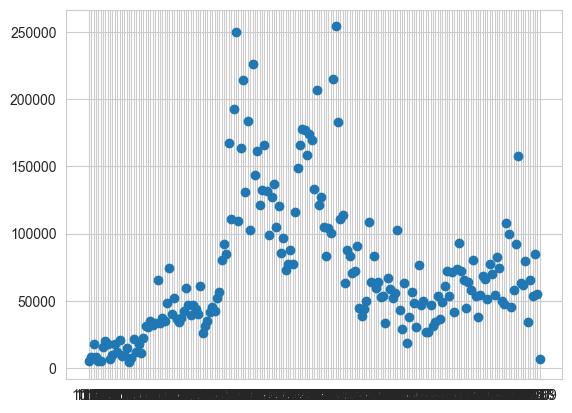

In [22]:
ax=plt.plot_date(per_min.index,per_min["count"],xdate=True)

In [23]:
from dateutil import parser
from datetime import datetime
import re